# Cross-Sectional

Standardized Data Sample:
     LSAS_1    LSAS_2    LSAS_3    LSAS_4    LSAS_5    LSAS_6    LSAS_7  \
0 -0.335228 -0.502132 -0.024781 -0.068952 -0.723623 -1.158135 -0.624364   
1 -0.930409 -1.088625 -0.688218 -0.678930 -1.335395 -1.641470 -1.153245   
2 -0.930409 -1.088625 -0.688218 -0.678930 -1.335395 -0.674800 -1.153245   
3  1.450315  0.084361  1.965531  1.760982 -0.111851  0.291870  1.491160   
4  0.259953  1.257347 -0.688218 -0.678930  1.111693  1.258540 -0.095483   

     LSAS_8    LSAS_9   LSAS_10  ...  BDI_Loss_Of_Interest  \
0 -1.372456 -1.102744 -1.410507  ...              0.465975   
1 -1.372456 -1.102744 -1.410507  ...             -0.758966   
2 -0.241588  0.017248 -0.285051  ...              1.690916   
3  1.454715  0.577243  1.965859  ...             -0.758966   
4  0.889280  0.017248  0.277676  ...             -0.758966   

   BDI_Indecisiveness  BDI_Worthlessness  BDI_Loss_Of_Energy  \
0            2.115305          -0.609045           -0.876312   
1           -0.564052 

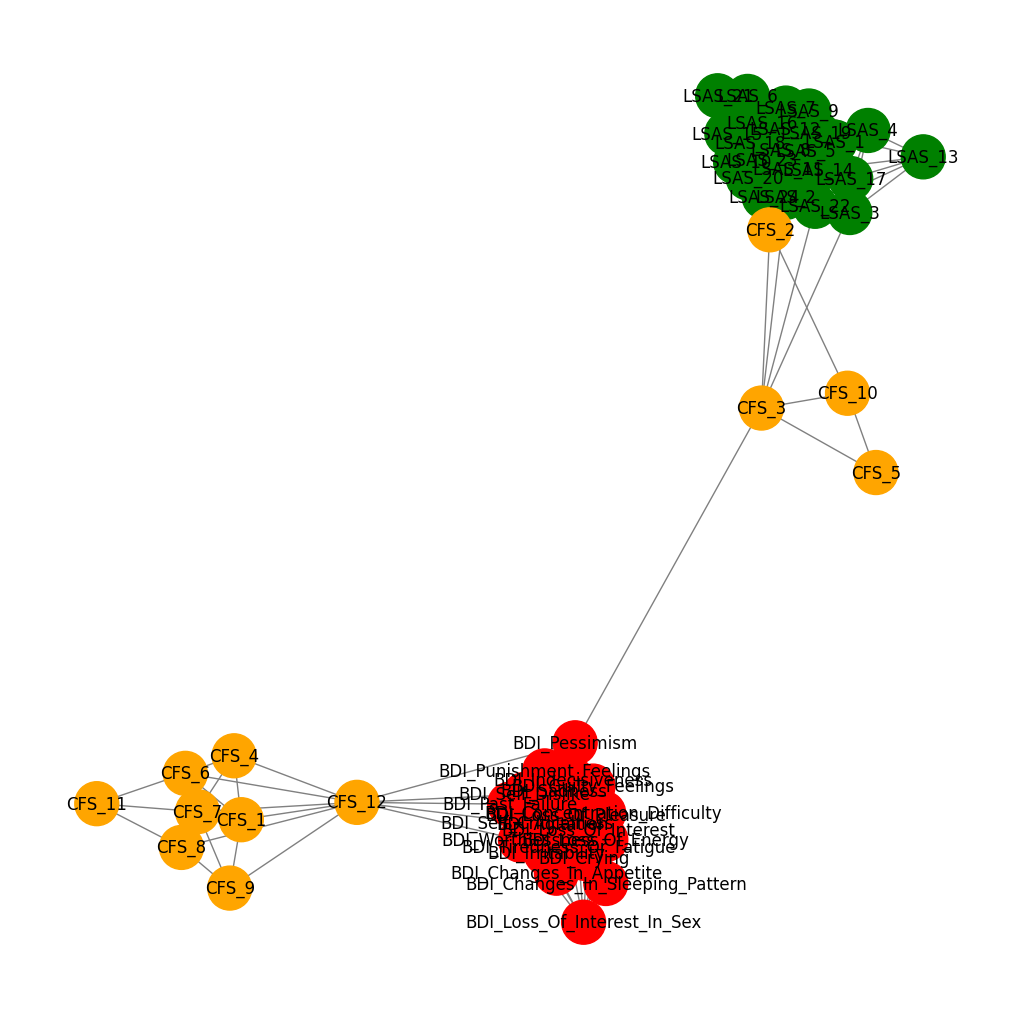

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\MadiL\Thesis CodeBase\Cross-Sectional\lsas_together.csv")

lsas_columns = [col for col in df.columns if "LSAS" in col]
cfs_columns = [col for col in df.columns if "CFS" in col]
bdi_columns = [col for col in df.columns if "BDI" in col]


# Subset the dataframe
### If we want to use demographics, don't subset
df_subset = df[lsas_columns + cfs_columns + bdi_columns].copy()

#df_subset[cfs_columns] = abs(df_subset[cfs_columns])

# Reverse score CFS questions 2, 3, 5, 10 in place
reverse_columns = ['CFS_2', 'CFS_3', 'CFS_5', 'CFS_10']

# Apply the reverse scoring transformation in place
df_subset[reverse_columns] = 7 - df_subset[reverse_columns]

# Reverse the direction of all CFS columns by multiplying by -1
df_subset[cfs_columns] = df_subset[cfs_columns] * -1


# Define a function to standardize values
# Ensures all columns have a mean of 0 and a standard deviation of 1
def standardize(df_column):
    return (df_column - df_column.mean()) / df_column.std()

# Standardize LSAS columns
df_subset[lsas_columns] = df_subset[lsas_columns].apply(standardize)

# Standardize CFS columns
df_subset[cfs_columns] = df_subset[cfs_columns].apply(standardize)

# Standardize BDI columns
df_subset[bdi_columns] = df_subset[bdi_columns].apply(standardize)

# Create a new DataFrame containing all the standardized individual items
df_standardized = df_subset[lsas_columns + cfs_columns + bdi_columns]

# Display the first few rows of the standardized data for inspection
print("Standardized Data Sample:")
print(df_standardized.head())

# Save the data for later
cross_sectional_data = df_standardized

# Compute the correlation matrix for the standardized data
standardized_correlation_matrix = df_standardized.corr()

correlation_matrix = standardized_correlation_matrix
# Set a correlation threshold to define a "strong" connection
threshold = 0.4

# Initialize an empty graph
G = nx.Graph()

# Add edges for pairs of questions that have a correlation above the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j],
                       weight=correlation_matrix.iloc[i, j])
            

# Number of nodes in the graph
print(f"Number of nodes: {G.number_of_nodes()}")

# Number of edges in the graph
print(f"Number of edges: {G.number_of_edges()}")

# Centrality analysis
centrality = nx.degree_centrality(G)
print("Most central symptoms:", sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10])

# Community detection
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)
print("Detected communities:", [list(c) for c in communities])

import networkx as nx
import matplotlib.pyplot as plt

# Define a function to color nodes based on their survey type
def get_node_color(node):
    if "LSAS" in node:
        return 'green'
    elif "CFS" in node:
        return 'orange'
    elif "BDI" in node:
        return 'red'
    else:
        return 'gray'  # Default color for unrecognized nodes

# Assign colors to nodes based on their labels
node_colors = [get_node_color(node) for node in G.nodes]

# Define node positions using spring layout
pos = nx.spring_layout(G)  # You can also try other layouts like nx.circular_layout(G)

# Create the plot
plt.figure(figsize=(10, 10))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, edge_color='gray')

# Show the plot
plt.show()



Top 10 nodes by degree centrality:
Node: LSAS_2, Centrality: 0.43636363636363634
Node: LSAS_11, Centrality: 0.41818181818181815
Node: LSAS_14, Centrality: 0.41818181818181815
Node: LSAS_19, Centrality: 0.41818181818181815
Node: LSAS_5, Centrality: 0.39999999999999997
Node: LSAS_7, Centrality: 0.39999999999999997
Node: LSAS_8, Centrality: 0.39999999999999997
Node: LSAS_12, Centrality: 0.39999999999999997
Node: LSAS_9, Centrality: 0.3818181818181818
Node: LSAS_16, Centrality: 0.3818181818181818


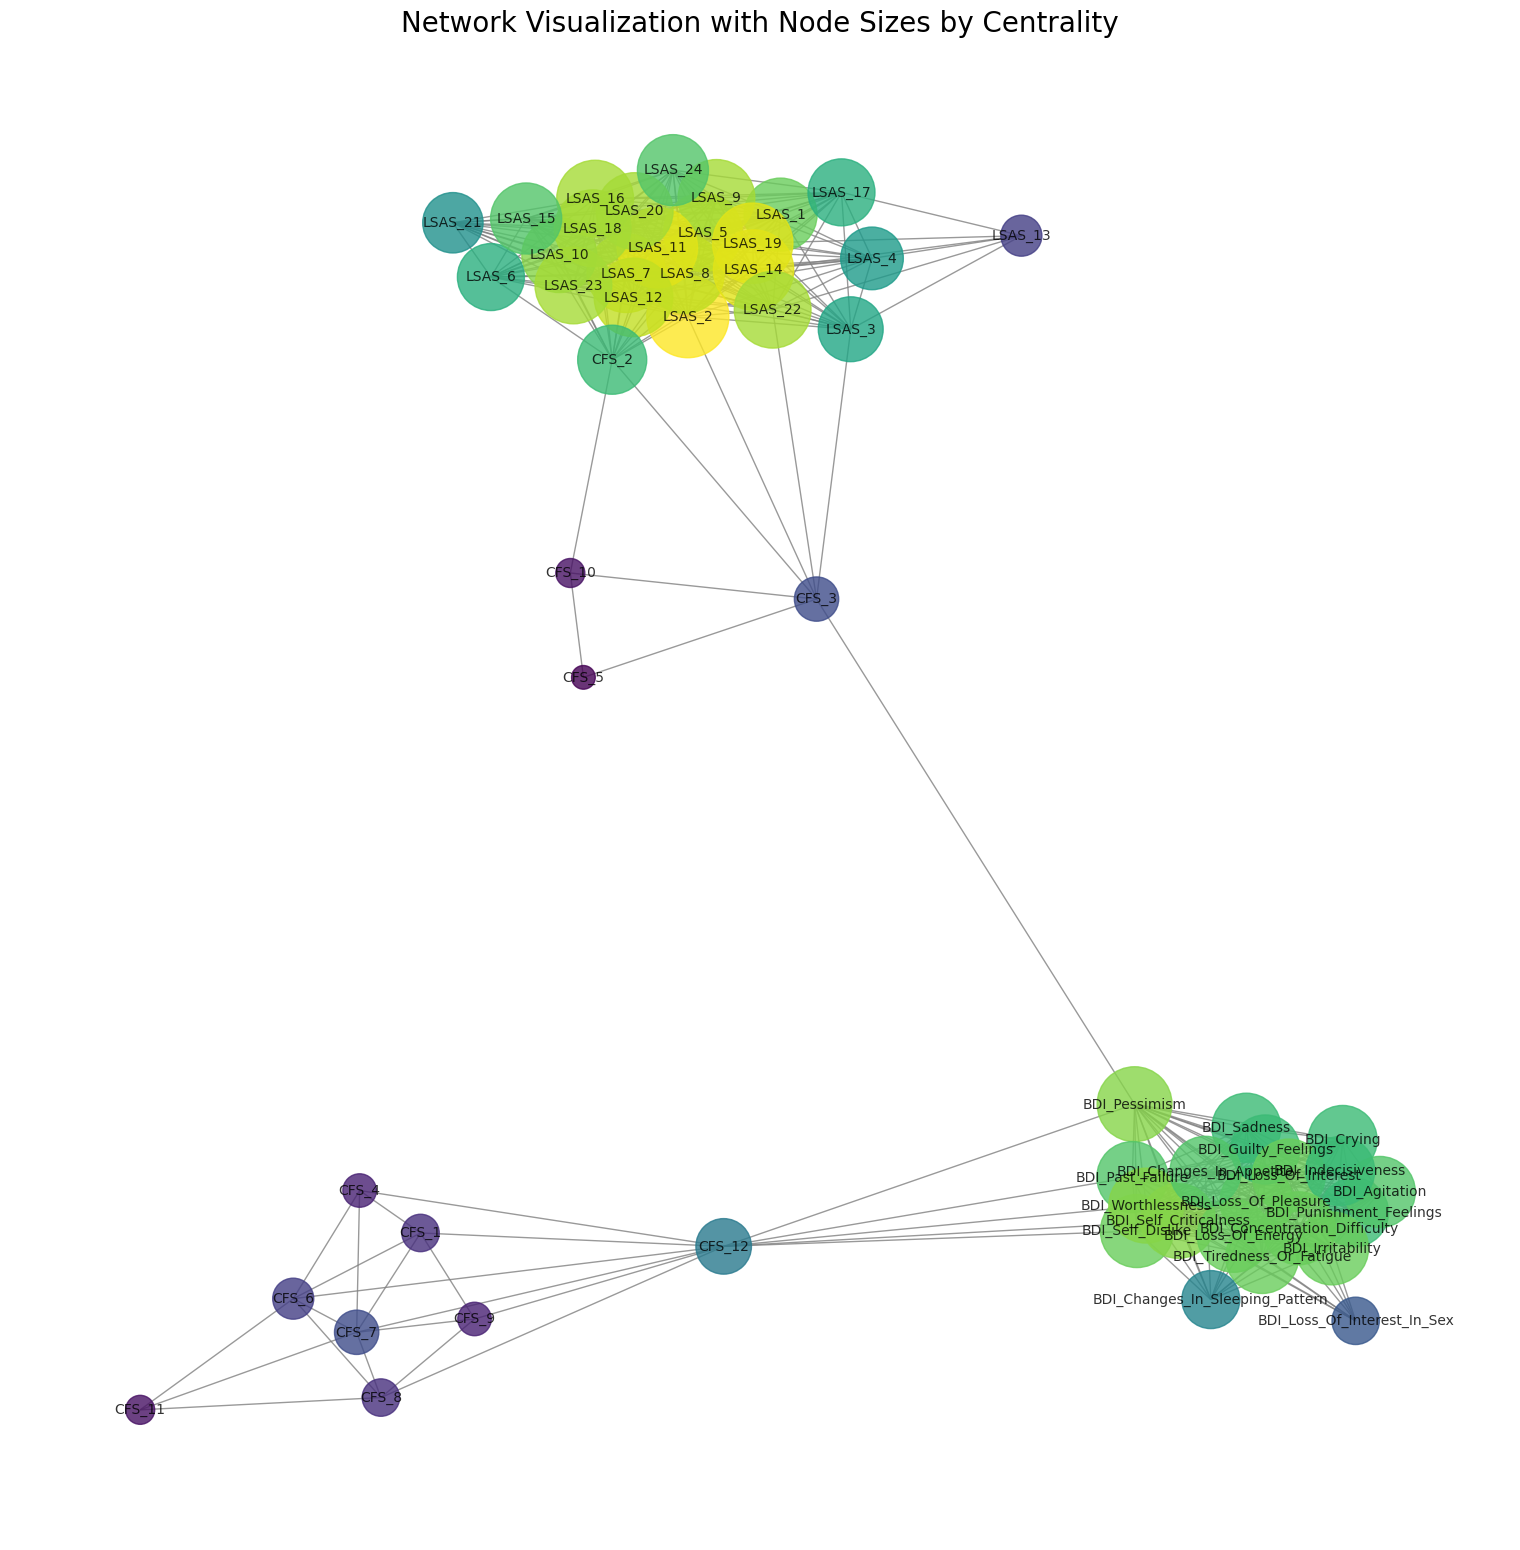

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Degree centrality
centrality = nx.degree_centrality(G)

# Top 10 central nodes
top_central_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by degree centrality:")
for node, centrality_score in top_central_nodes:
    print(f"Node: {node}, Centrality: {centrality_score}")

# Visualize centrality
node_sizes = [8000 * centrality[node] for node in G.nodes()]  # Adjusted scaling for clarity
plt.figure(figsize=(15, 15))  # Increase figure size
pos = nx.spring_layout(G, seed=42)  # Consistent layout for readability

# Draw the graph
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    cmap=plt.cm.viridis,
    node_color=list(centrality.values()),
    font_size=10,  # Larger font size for labels
    font_color='black',
    edge_color='gray',
    alpha=0.8
)
plt.title('Network Visualization with Node Sizes by Centrality', fontsize=20)
plt.show()


# Longitudinal

In [3]:
# Load the dataset

df = pd.read_csv(r'C:\Users\MadiL\Thesis CodeBase\Longitudinal\Individual Questions\long_data_standardized.csv')

# Step 1: Convert StartDate to datetime and extract Year-Month
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['YearMonth'] = df['StartDate'].dt.to_period('M')

# Step 2: Identify months with the highest participant counts
monthly_counts = df.groupby('YearMonth')['Participant_Number'].nunique().reset_index()
monthly_counts.columns = ['YearMonth', 'Participant_Count']

# Step 3: Select three months based on participant counts and temporal coverage
# (Prioritize high counts while ensuring early, middle, and late coverage)
selected_months = ['2019-07', '2020-01', '2020-05']

# Step 4: Filter the dataset for the selected months
df['YearMonth'] = df['YearMonth'].astype(str)  # Convert YearMonth to string for filtering
filtered_df = df[df['YearMonth'].isin(selected_months)]

# Step 5: Aggregate data by participant, month, and test type
aggregated_df = (
    filtered_df.groupby(['Participant_Number', 'YearMonth', 'Question'])['Score']
    .mean()
    .reset_index()
)

# Step 6: Reshape data into wide format
wide_df = aggregated_df.pivot_table(
    index='Participant_Number',
    columns=['YearMonth', 'Question'],
    values='Score'
).reset_index()

# Flatten multi-index columns
wide_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in wide_df.columns]

# Display the resulting DataFrame
# Save the reshaped dataset if needed
wide_df.to_csv('aggregated_data_wide.csv', index=False)

df = wide_df

Analyzing network for 2019-07...
Number of nodes: 56
Number of edges: 503


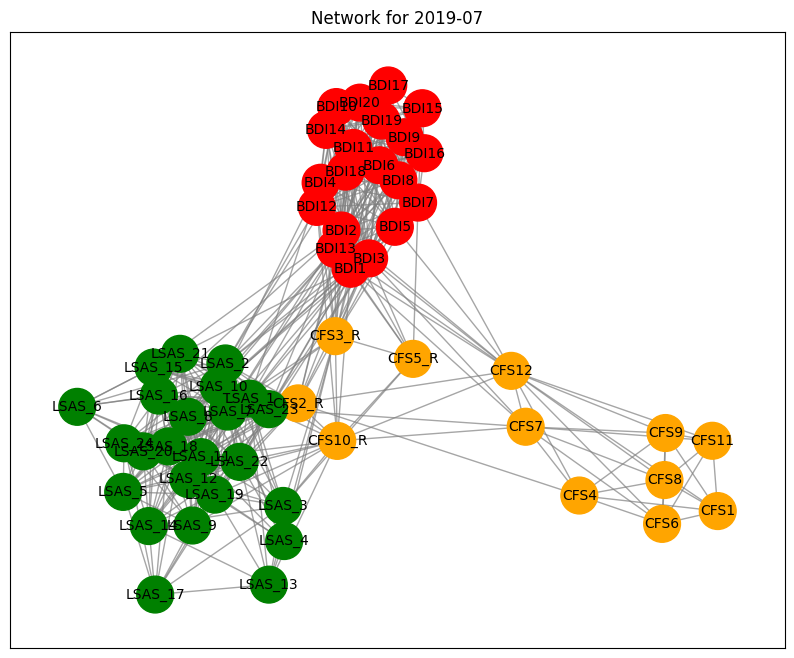

Analyzing network for 2020-01...
Number of nodes: 54
Number of edges: 404


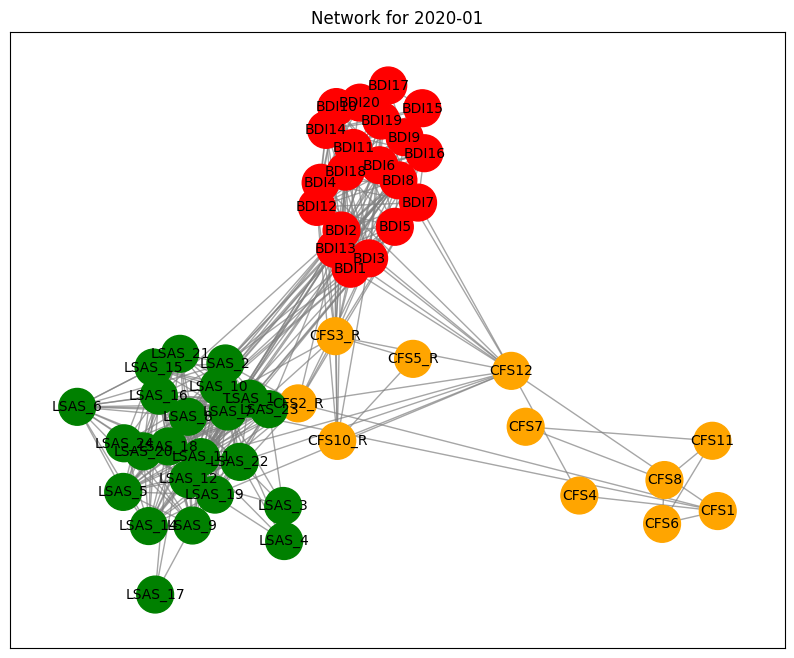

Analyzing network for 2020-05...
Number of nodes: 55
Number of edges: 289


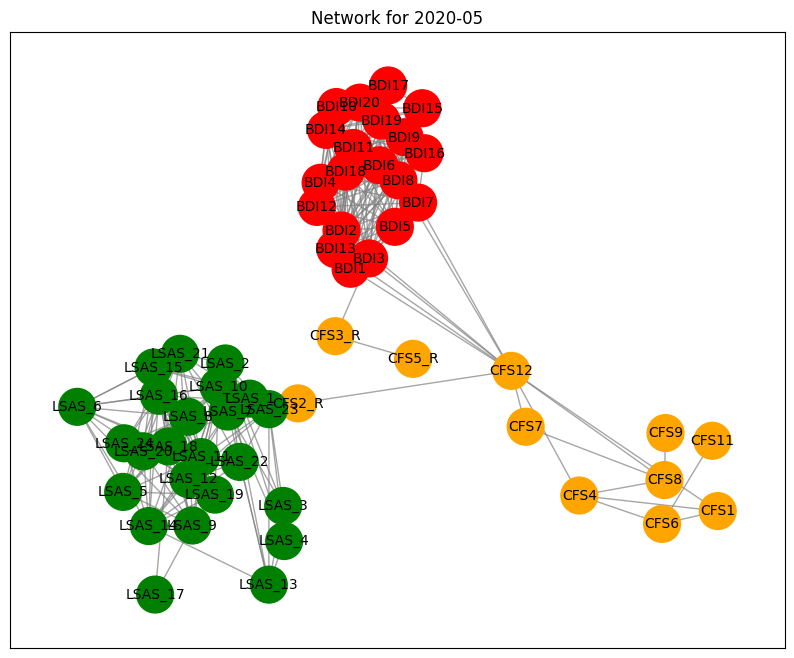

In [4]:
# Define months for analysis
months = ['2019-07', '2020-01', '2020-05']

# Define color mapping for test types
color_mapping = {
    'BDI': 'red',
    'LSAS': 'green',
    'CFS': 'orange'
}

# Function to assign colors based on test type
def assign_color(node):
    for test, color in color_mapping.items():
        if test in node:  # Check if the test type is in the node name
            return color
    return 'gray'  # Default color for unmatched nodes

# Function to construct and analyze a network with a pinned node and consistent layout
def analyze_networks(dataframes, threshold=0.4):
    global_layout = None  # Store the global layout
    
    for month, data in dataframes.items():
        print(f"Analyzing network for {month}...")
        
        # Compute correlation matrix
        corr_matrix = data.corr()
        
        # Initialize a graph
        G = nx.Graph()
        full_to_short = {}  # Mapping from full to short names
        
        # Add edges based on the threshold
        for i in range(len(corr_matrix.columns)):
            for j in range(i + 1, len(corr_matrix.columns)):
                if np.abs(corr_matrix.iloc[i, j]) > threshold:
                    full_name_i = corr_matrix.columns[i]
                    full_name_j = corr_matrix.columns[j]
                    short_name_i = full_name_i.split('_', 1)[1]
                    short_name_j = full_name_j.split('_', 1)[1]
                    G.add_edge(short_name_i, short_name_j, weight=corr_matrix.iloc[i, j])
                    
                    # Update the mapping
                    full_to_short[full_name_i] = short_name_i
                    full_to_short[full_name_j] = short_name_j


        # Compute the layout
        if global_layout is None:
            # For the first network, calculate the layout
            pos = nx.spring_layout(G, seed=42)
            global_layout = pos  # Save the global layout
        else:
            # Reuse the global layout
            pos = global_layout

        # Assign colors to nodes
        node_colors = [assign_color(node) for node in G.nodes]
        
        # Print graph properties
        print(f"Number of nodes: {G.number_of_nodes()}")
        print(f"Number of edges: {G.number_of_edges()}")
        
        # Visualize the graph
        plt.figure(figsize=(10, 8))
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)
        nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.7)
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
        plt.title(f"Network for {month}")
        plt.show()

# Prepare data for each month
dataframes = {}
for month in months:
    month_columns = [col for col in df.columns if month in col]
    month_data = df[month_columns].dropna()  # Drop rows with missing data
    dataframes[month] = month_data

# Perform network analysis with consistent layout
analyze_networks(dataframes)